**<h1>CASO 1</h1>**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
#Importar base de datos
df = pd.read_csv('nike_shoes_sales.csv')

In [3]:
df.head()

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."


In [4]:
df.info

<bound method DataFrame.info of                              product_name  product_id  listing_price  \
0          Nike Air Force 1 '07 Essential  CJ1646-600              0   
1                    Nike Air Force 1 '07  CT4328-101              0   
2            Nike Air Force 1 Sage Low LX  CI3482-200              0   
3                     Nike Air Max Dia SE  CD0479-200              0   
4                     Nike Air Max Verona  CZ6156-101              0   
..                                    ...         ...            ...   
638                    Air Jordan 8 Retro  CI1236-100          15995   
639            Nike Phantom Venom Club IC  AO0578-717           4995   
640  Nike Mercurial Superfly 7 Academy TF  AT7978-414           8495   
641                       Nike Air Max 98  AH6799-300              0   
642                        Nike P-6000 SE  CJ9585-600           8995   

     sale_price  discount brand  \
0          7495         0  Nike   
1          7495         0  Nike  

In [5]:
df.describe()

,listing_price,sale_price,discount,rating,reviews
count,643.000000,643.000000,643.0,643.000000,643.000000
mean,3875.762053,10213.676516,0.0,2.734837,7.181960
std,5889.947172,4513.289512,0.0,2.137756,15.968315
min,0.000000,1595.000000,0.0,0.000000,0.000000
25%,0.000000,6995.000000,0.0,0.000000,0.000000
50%,0.000000,9597.000000,0.0,3.800000,1.000000
75%,8495.000000,12797.000000,0.0,4.600000,6.000000
max,19995.000000,36500.000000,0.0,5.000000,223.000000


Hasta el momento se puede observar que no hay descuentos para ninguna referencia, el rating se califica de 0 a 5, el máximo precio de un par de tenis es de $36.500 USD y su mínimo es de $1.595 USD, el precio promedio es de $10.213 USD, con esto se podría decir que los tenis nike son para un cliente con un poder adquisitivo muy alto, y probablemente la mayoría de los tenis de la base de datos son ediciones limitadas o colecciones sofisticadas. Se observa también que no hay reviews de las personas en la gran mayoría de las referencias. 

**Si el "listing_price" se interpreta como el costo de colocar una referencia de tenis a la venta y el "sale_price" como el precio de venta al cliente, las utilidades sin tener en cuenta costos y gastos de la operación, son bastante altas.**

Se trabajará con sale_price como variable dependiente (Y), encontraremos los predictores más adelante con los análisis de significancia y coeficiente de determinación.

In [6]:
total_faltantes_por_columna = df.isnull().sum()
total_faltantes_por_columna

product_name      0
product_id        0
listing_price     0
sale_price        0
discount          0
brand             0
description       3
rating            0
reviews           0
images           71
dtype: int64

Se limpiará la base de datos, es decir, se borrarán las columnas que en este caso no serviran para el análisis como lo son "discount" e "images".

In [7]:
df.drop(['discount', 'images'], axis=1, inplace=True)

Además se llenarán los faltantes

In [63]:
df['description'].fillna('', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20872\2526826900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)


In [64]:
df.head()

,product_name,product_id,listing_price,sale_price,brand,description,rating,reviews
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0
1,Nike Air Force 1 '07,CT4328-101,0,7495,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,Nike,"Taking both height and craft to new levels, th...",0.0,0
3,Nike Air Max Dia SE,CD0479-200,0,9995,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0
4,Nike Air Max Verona,CZ6156-101,0,9995,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0


Se realizarán gráficos para observar la distribución y el comportamiento de los datos.

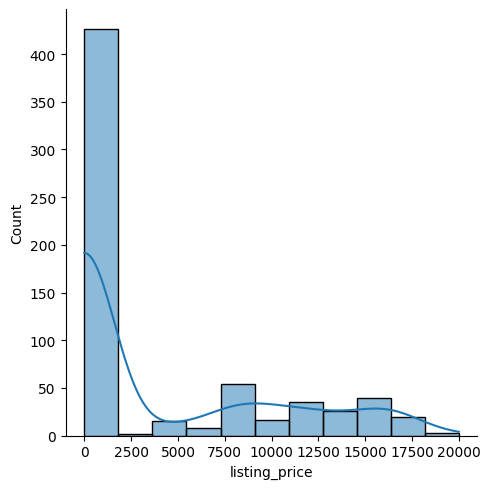

In [65]:
sns.displot(data=df, x="listing_price", kde=True)

Como se puede observar la mayoria de los datos tienen un costo de venta de 0, es decir para la empresa es muy rentable vender cada par de tenis, los máximos costos son de $20.000 USD, sin embargo, estos son sustentados con el precio de venta al cliente final. Además, analizamos que algunas referencias con listing_price "0", puede que sean erróneos ya que el costo de salir a la venta, cuenta con logística, producción, mano de obra, materia prima, etc. Es por esto que esta variable se revisará más adelante. 

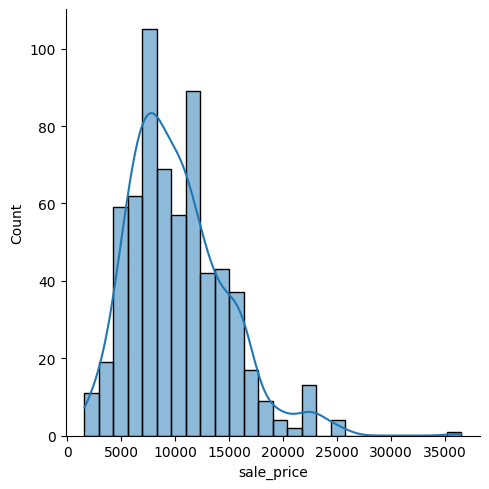

In [66]:
sns.displot(data=df, x="sale_price", kde=True)

La distribución de la variable "sale_price" se parece más a una distribución normal con algunos datos atípicos. Estos, como se menconó anteriormente pueden deberse a referencias limitadas o muy exclusivas.

También se eliminará los ratings de 0 para la gráfica, ya que significan que no hubo calificación.

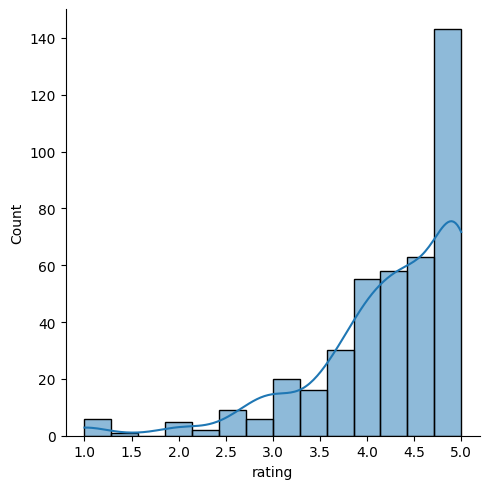

In [67]:
sns.displot(data=df[df["rating"] != 0], x="rating", kde=True)

Se observa que las calificaciones son altas, hay muy pocas bajas, y la gran mayoría tienen una calificación de 5.

Realizaremos una categorización de los rating para que sean intervalos.

In [68]:
def categorize_rating(rating):
    if rating < 2:
        return 1
    elif rating < 4:
        return 2
    else:
        return 3

df['category'] = df['rating'].apply(categorize_rating)

print(df)

                             product_name  product_id  listing_price  \
0          Nike Air Force 1 '07 Essential  CJ1646-600              0   
1                    Nike Air Force 1 '07  CT4328-101              0   
2            Nike Air Force 1 Sage Low LX  CI3482-200              0   
3                     Nike Air Max Dia SE  CD0479-200              0   
4                     Nike Air Max Verona  CZ6156-101              0   
..                                    ...         ...            ...   
638                    Air Jordan 8 Retro  CI1236-100          15995   
639            Nike Phantom Venom Club IC  AO0578-717           4995   
640  Nike Mercurial Superfly 7 Academy TF  AT7978-414           8495   
641                       Nike Air Max 98  AH6799-300              0   
642                        Nike P-6000 SE  CJ9585-600           8995   

     sale_price brand                                        description  \
0          7495  Nike  Let your shoe game shimmer in the Ni


Se realiza una categorización de la variable "rating" basados en una estructura NPS para así entender de manera más acertada el comportamiento de los datos y hacer un trabajo más exacto al agrupar los valores dentro de tres categorías, aunque manteniendo la variable como numérica.

<img src="Escala-NPS-1024x536.png" alt="Ejemplo" width="40%" height="40%">

In [69]:
df['category']

0      1
1      1
2      1
3      1
4      1
      ..
638    3
639    1
640    3
641    3
642    1
Name: category, Length: 643, dtype: int64

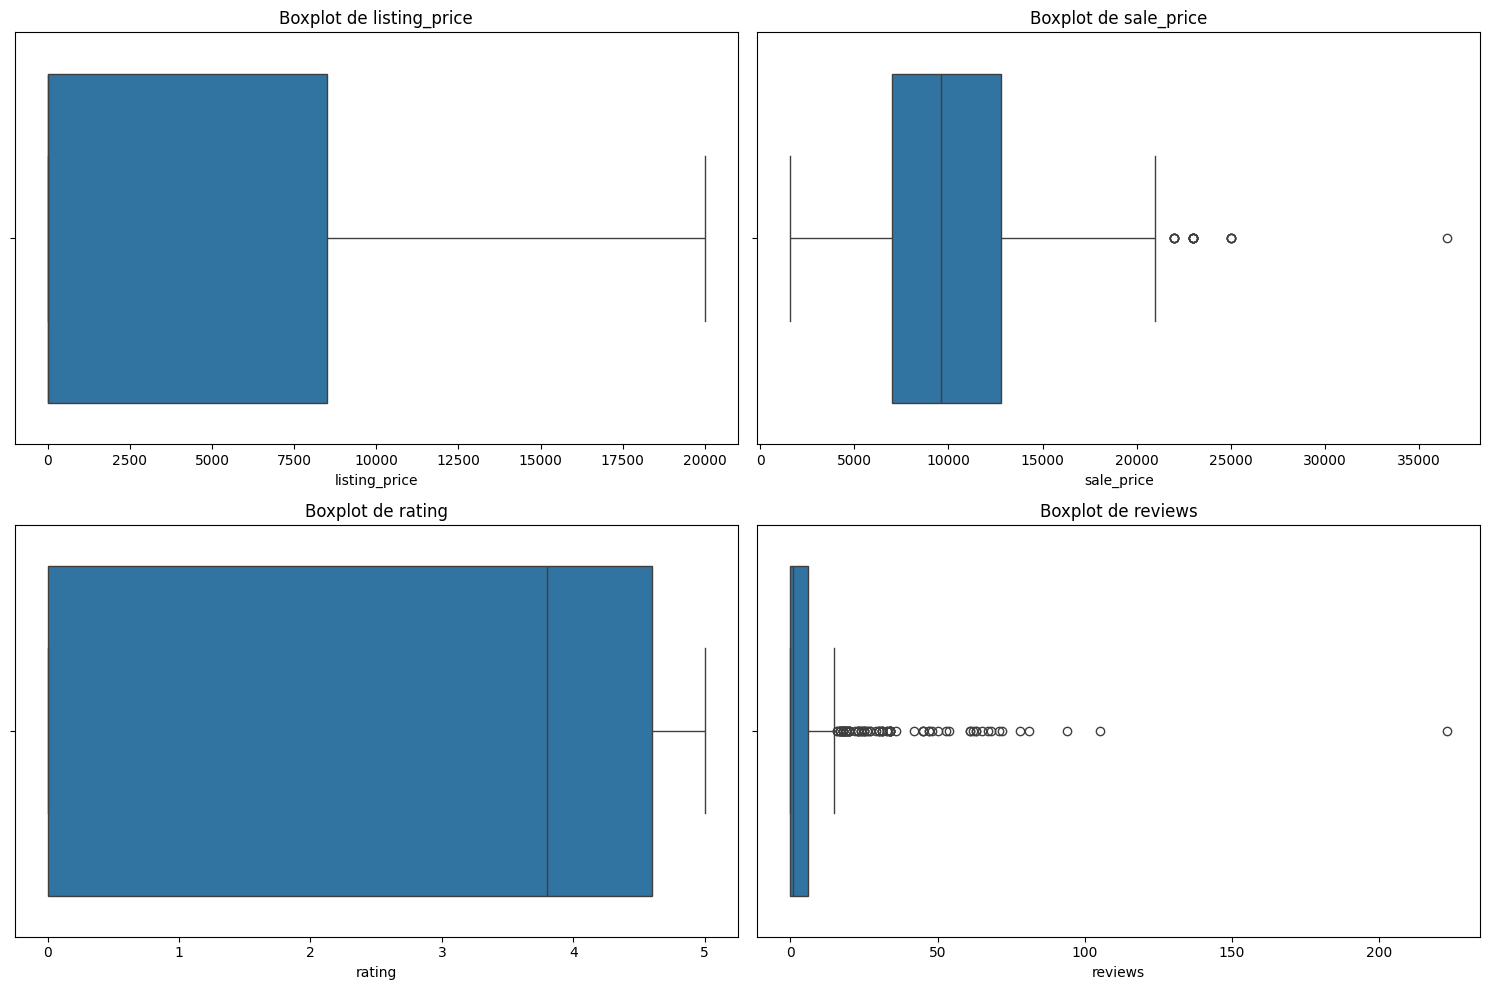

In [70]:
columnas_deseadas = ['listing_price', 'sale_price', 'rating', 'reviews']

# Crear boxplots separados para las columnas deseadas
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_deseadas):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')

# Ajustar el espaciado entre subgráficas
plt.tight_layout()

# Mostrar los boxplots
plt.show()

Podemos visualizar de nuevo como los listing_price tiene valores de 0 a 8000, más adelante imputaremos los datos del listing_price de 0, ya que aunque los costos de producir y lanzar a la venta un par de tenis, tiene logística, empaque, mano de obra, materia prima, podemos concluir que puede que algunos datos no hayan sido registrados, sería interesante para la regresión lineal observar como estas variables anteriormente nombradas afectan al sale_price por separado.

Para analizar la gráfica de sale_price, podemos observar que hay algunos datos atípicos, estos pueden significar ediciones limitadas y exclusivas, con el análisis de regresión eliminaremos estos y realizaremos pruebas para saber si estos datos afectan la regresión.

Se puede observar que el rating va desde 0 a 5, situando la mayoría de los datos hacia 4 y 5. 

Para la variable de "reviews", se observa que en la mayoría de las referencias no se tiene reviews, sin embargo, hay bastantes atípicos, y se encuentra una referencia que tiene más de 200 reviews, se podría analizar como la referencia más llamativa, que puede que tenga buenos o malos comentarios, pero que se podria calificar como una referencia que se le ha hecho un trabajo extenso de marketing. 

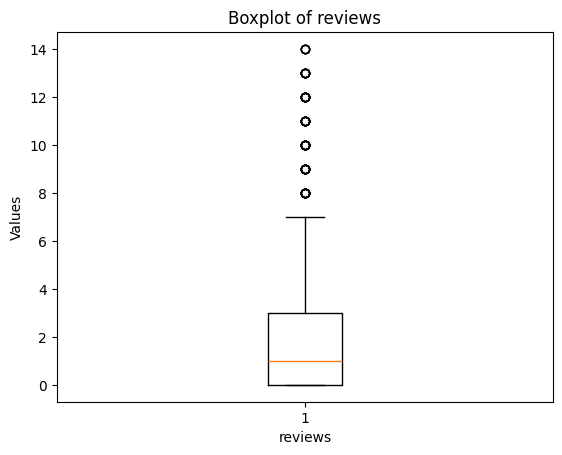

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming that df is your DataFrame and reviews is the name of the column you want to analyze

# Calculate the quartiles and the IQR
Q1 = df['reviews'].quantile(0.25)
Q3 = df['reviews'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_atip_reviews = df[(df['reviews'] > lower_bound) & (df['reviews'] < upper_bound)]

# Create a boxplot
plt.boxplot(df_atip_reviews['reviews'])
plt.xlabel('reviews')
plt.ylabel('Values')
plt.title('Boxplot of reviews')
plt.show()


Se realiza una limpieza dentro de la variable "reviews", puesto que se llegó a la conclusión de que esta variable y todos los valores atípicos que poseía podían estar generando sesgo dentro del ajuste del modelo. Así que se redujo a los cuantiles más cercanos para disminuir en gran número el exceso de datos atípicos.

In [72]:
df_atip_reviews.head()

,product_name,product_id,listing_price,sale_price,brand,description,rating,reviews,category
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,1
1,Nike Air Force 1 '07,CT4328-101,0,7495,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,1
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,Nike,"Taking both height and craft to new levels, th...",0.0,0,1
3,Nike Air Max Dia SE,CD0479-200,0,9995,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,1
4,Nike Air Max Verona,CZ6156-101,0,9995,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,1


In [73]:
valores_unicos = df_atip_reviews['reviews'].unique()

# Imprimir los valores únicos
print(valores_unicos)

[ 0  1 14  2  9  6  4  5  7  3 13  8 11 10 12]


In [74]:
tabla_frecuencia = df_atip_reviews['reviews'].value_counts()

# Convertir la tabla de frecuencia en un DataFrame para visualización
df_frecuencia = pd.DataFrame(tabla_frecuencia)

# Renombrar las columnas del DataFrame
df_frecuencia.columns = ['Frecuencia']

# Mostrar la tabla de frecuencia
print(df_frecuencia)

         Frecuencia
reviews            
0               229
1                99
2                51
3                35
5                31
4                21
6                17
10               11
8                10
9                 9
7                 9
12                9
11                8
13                7
14                4


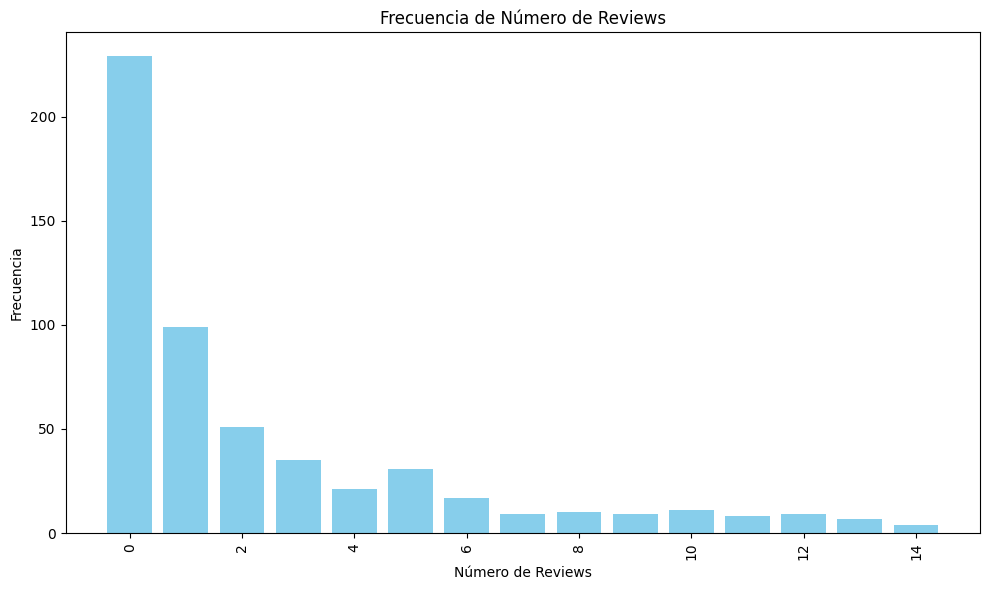

In [75]:
df_frecuencia_sorted = df_frecuencia.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_frecuencia_sorted.index, df_frecuencia_sorted['Frecuencia'], color='skyblue')
plt.xlabel('Número de Reviews')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Número de Reviews')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

Se observa como quedo la distribución de los datos de "reviews" quedá después de eliminar datos atípicos, se observa que existen una gran cantidad de referencias de tenis que no tienen reviews, y que por ejemplo, los tenis es un producto en el cual las personas no suelen dejar sus reseñas o al menos no en la página oficial.

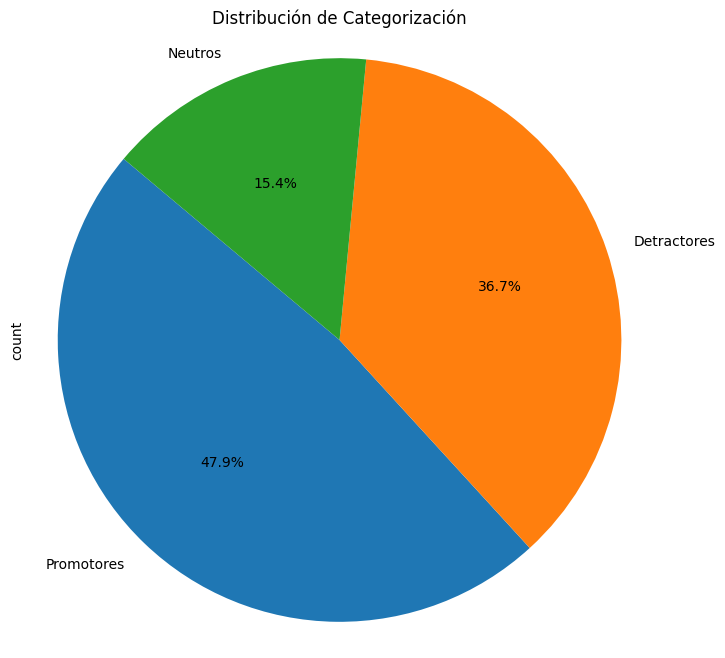

In [41]:
leyendas = {1: 'Detractores', 2: 'Neutros', 3: 'Promotores'}

# Reemplazar valores numéricos con leyendas
df['category'] = df['category'].map(leyendas)

# Graficar el gráfico de torta de la columna de categorización
plt.figure(figsize=(8, 8))
df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Categorización')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Agregar leyenda personalizada


# Mostrar el gráfico
plt.show()


Se demuestra la categorización en cómo los promotores son mayores, es decir, que existe un gran volumen de productos que, a la percepción del cliente, son muy buenos y estan satisfechos. Aunque se encuentra error en cómo la siguiente más grande son los detractores y en este caso, es una población significativa, esto indica que hay una proporción considerable de la población que tiene opiniones negativas y puede expresar críticas o insatisfacción, lo ideal sería que fueran los neutros los siguientes de los promotores. 

<h1>Proceso de transformación de la base de datos</h1>

Podemos analizar que la base de datos puede que no haya registro de los listing price correctos para cada una de las referencias, ya que si deben tener un costo para salir al mercado en la mayoría.


Por esta razón decidimos imputar los datos con valor de 0, con la media.

In [76]:
df_media = df_atip_reviews.copy()
df_media['listing_price'].replace(0, pd.NA, inplace=True)

# Calcular la media de la columna "listing_price" excluyendo los valores NaN
media_listing_price = df_atip_reviews['listing_price'].mean()

# Imputar los valores faltantes en la columna "listing_price" con la media calculada
df_media['listing_price'].fillna(media_listing_price, inplace=True)

# Imprimir las primeras filas del DataFrame con valores imputados
print(df_media.head())

print(media_listing_price)



                     product_name  product_id  listing_price  sale_price  \
0  Nike Air Force 1 '07 Essential  CJ1646-600    3785.427273        7495   
1            Nike Air Force 1 '07  CT4328-101    3785.427273        7495   
2    Nike Air Force 1 Sage Low LX  CI3482-200    3785.427273        9995   
3             Nike Air Max Dia SE  CD0479-200    3785.427273        9995   
4             Nike Air Max Verona  CZ6156-101    3785.427273        9995   

  brand                                        description  rating  reviews  \
0  Nike  Let your shoe game shimmer in the Nike Air For...     0.0        0   
1  Nike  The legend lives on in the Nike Air Force 1 '0...     0.0        0   
2  Nike  Taking both height and craft to new levels, th...     0.0        0   
3  Nike  Designed for a woman's foot, the Nike Air Max ...     0.0        0   
4  Nike  Pass on the good vibes in the Nike Air Max Ver...     0.0        0   

   category  
0         1  
1         1  
2         1  
3         1 

C:\Users\DELL\AppData\Local\Temp\ipykernel_20872\1993904798.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_media['listing_price'].replace(0, pd.NA, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20872\1993904798.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_media['listing_price'].fill

In [79]:
df_media.head()

,product_name,product_id,listing_price,sale_price,brand,description,rating,reviews,category
0,Nike Air Force 1 '07 Essential,CJ1646-600,3785.427273,7495,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,1
1,Nike Air Force 1 '07,CT4328-101,3785.427273,7495,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,1
2,Nike Air Force 1 Sage Low LX,CI3482-200,3785.427273,9995,Nike,"Taking both height and craft to new levels, th...",0.0,0,1
3,Nike Air Max Dia SE,CD0479-200,3785.427273,9995,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,1
4,Nike Air Max Verona,CZ6156-101,3785.427273,9995,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,1


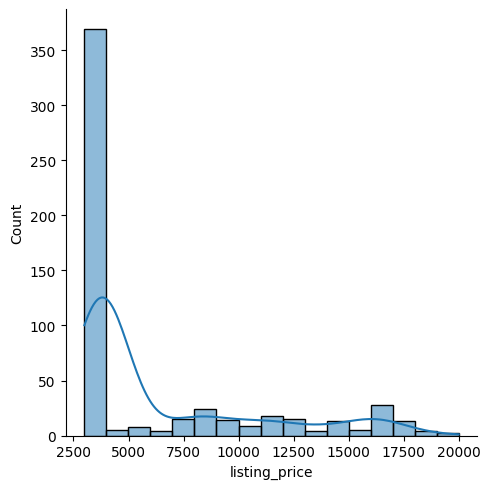

In [80]:
sns.displot(data=df_media, x="listing_price", kde=True)

Como se puede observar la mayoría de los datos se cambiaron a 3785 de listing_price.

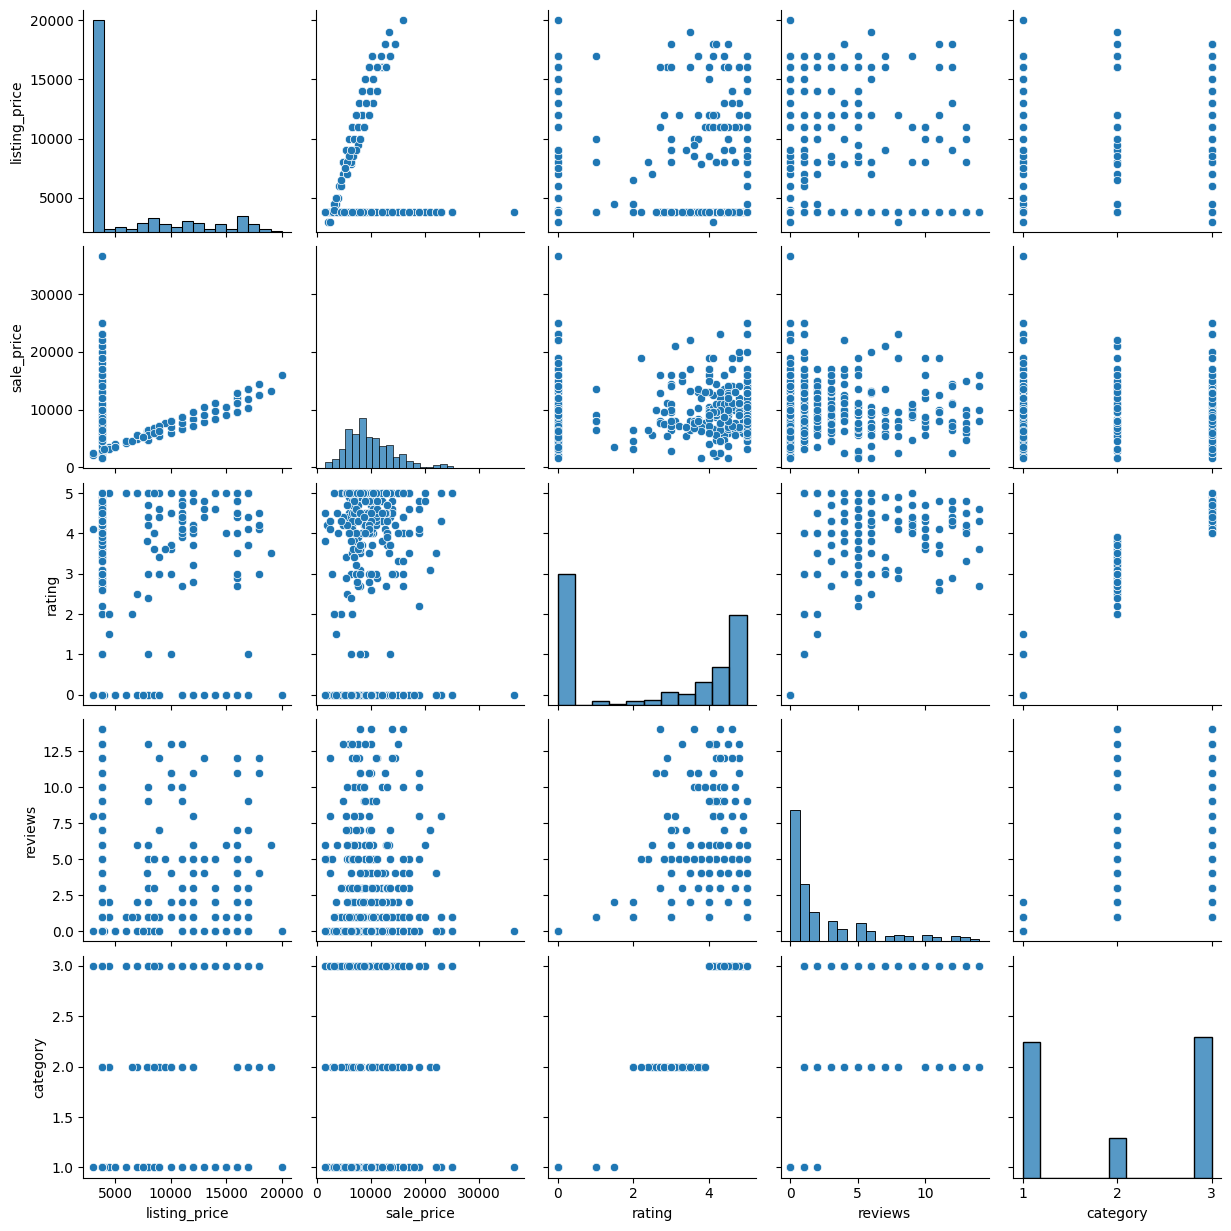

In [83]:
sns.pairplot(df_media)

Se puede observar que estos datos no se comportan de las misma manera que los demás, es decir se observa como una línea de datos de 3785 corta la gráfica, es por esto que se tomarán como atipicos los datos de listing_price iguales a 0 del anterior df, esto, para realizar una mejor regresión y que se ajusten mejor. 

In [84]:

# Eliminar las filas donde el valor de "listing_price" es igual a 0
df_nuevo = df_atip_reviews.copy()
df_nuevo = df_atip_reviews[df_atip_reviews['listing_price'] != 0]

print(df_nuevo.head())


                                  product_name  product_id  listing_price  \
21                          Nike SB Bruin High  923112-001           7995   
33                    Nike Joyride Run FlyKnit  CI3707-100          15995   
56                    Nike Air Max Tailwind 99  CQ6569-001          15995   
69  Nike Epic Phantom React A.I.R. Cody Hudson  CI1718-001          13995   
87                    Nike Free RN Flyknit 3.0  AQ5707-001          10995   

    sale_price brand                                        description  \
21        5597  Nike  The first Nike SB shoe designed specifically f...   
33       11997  Nike  The Nike Joyride Run Flyknit is designed to he...   
56       11197  Nike  The Nike Air Max Tailwind 99 has a storied his...   
69        8397  Nike  Soft to the touch, the Nike Epic Phantom React...   
87        7697  Nike  Ideal for runs up to 3 miles, the Nike Free RN...   

    rating  reviews  category  
21     4.2        6         3  
33     0.0        0   

Para realizar un mejor análisis de las ganancias de los tenis, haremos una nueva columna de ganancias, teniendo en cuenta que listing_price es el costo de salir al mercado y sale_price es el precio al cliente como ya lo mencionamos. 
Los datos demuestran una asimetría o desequilibrio dentro de la tendencia de manera brusca debido al comportamiento inusual de la variable listing price con valores iguales a cero, puesto que dentro del contexto real no puede haber un costo de puesta a la venta de cero esto reflejaría que la adquisición del producto para el vendedor es de cero, siendo así un comportamiento insostenible dentro del caso de estudio además de corromper el comportamiento de los datos.

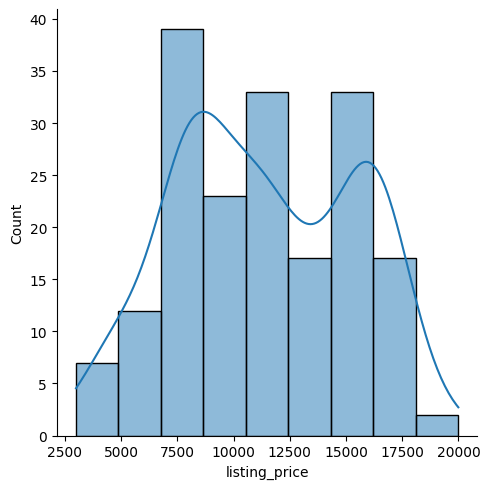

In [85]:
sns.displot(data=df_nuevo, x="listing_price", kde=True)

In [86]:
df_nuevo['resta'] = df_nuevo['sale_price'] - df_nuevo['listing_price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_20872\478957022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['resta'] = df_nuevo['sale_price'] - df_nuevo['listing_price']


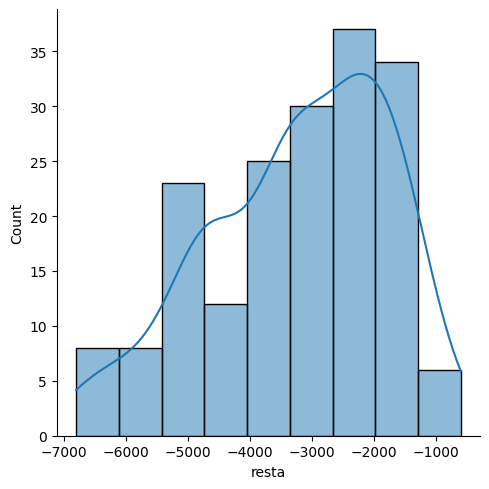

In [87]:
sns.displot(data=df_nuevo, x="resta", kde=True)

Se observa que hay pérdidas, promociones o salidas del mercado de las referencias que no fueron eliminadas. 

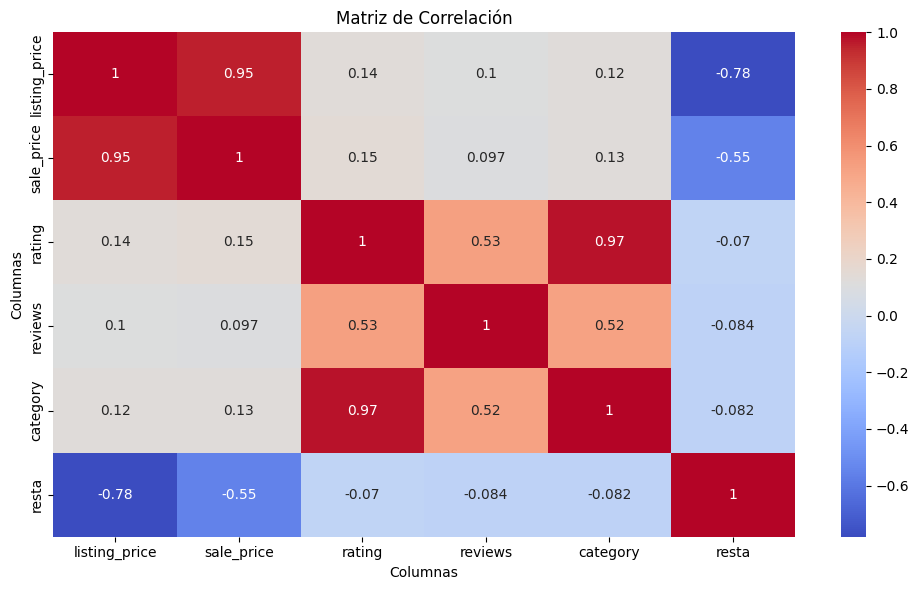

In [88]:
df_numeric = df_nuevo.drop(columns=['product_name','product_id','brand','description'])

# Calcular la matriz de correlación entre las columnas numéricas del DataFrame
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Personalizar la gráfica
plt.title('Matriz de Correlación')
plt.xlabel('Columnas')
plt.ylabel('Columnas')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Existen correlaciones positivas entre el precio de venta y el precio de lista (0.95), mostrando que a medida que aumenta el precio de lista, el precio de venta también tiende a aumentar. Desde este momento se interpreta que existe multicolinealidad, esto puede tener efectos negativos en la regresión lineal, ya que así, las estimaciones de los coeficientes pueden volverse extremadamente sensibles a pequeños cambios en los datos de entrada, lo que resulta en coeficientes poco confiables y poco precisos. Sin embargo, se interpreta que existirá este problema ya que la política de fijación de precios en este negocio se guía de acuerdo al costo de venta es decir, según el listing_price, se colocará el sale_price. 


Hay una correlación positiva entre el precio de venta y la calificación (0.15), lo que sugiere que a medida que aumenta la calificación, el precio de venta también tiende a aumentar, posiblemente debido a una mejor calidad o satisfacción del cliente. Otra correlación positiva se encuentra entre el precio de venta y el número de reseñas (0.097), mostrando que a medida que aumenta el número de reseñas, el precio de venta también tiende a aumentar en una pequeña medida, posiblemente debido a la popularidad o mayor visibilidad.

También hay correlaciones positivas entre el precio de lista y la calificación (0.14), indicando que a medida que aumenta la calificación, el precio de lista también tiende a aumentar. Además, el precio de lista y el número de reseñas (0.1) tienen una correlación positiva, mostrando que a medida que aumenta el número de reseñas, el precio de lista también tiende a aumentar. Finalmente, la calificación y el número de reseñas (0.53) tienen una fuerte correlación positiva, lo que indica que a medida que aumenta el número de reseñas, la calificación también tiende a aumentar.

Sin embargo, también se encontraron correlaciones negativas en la matriz. En particular, el precio de venta y las utilidades (variable "resta") tienen una correlación negativa (-0.55), mostrando que a medida que aumenta el precio de venta, las utilidades tienden a disminuir. Esto puede deberse a que, a pesar de vender las zapatillas a un precio más alto, los costos de producción, marketing u otros factores pueden aumentar, lo que reduce las utilidades. De manera similar, el precio de lista y las utilidades (variable "resta") tienen una correlación negativa (-0.78), indicando que a medida que aumenta el precio de lista, las utilidades tienden a disminuir, posiblemente debido a que los costos aumentan más rápido que el precio de lista.

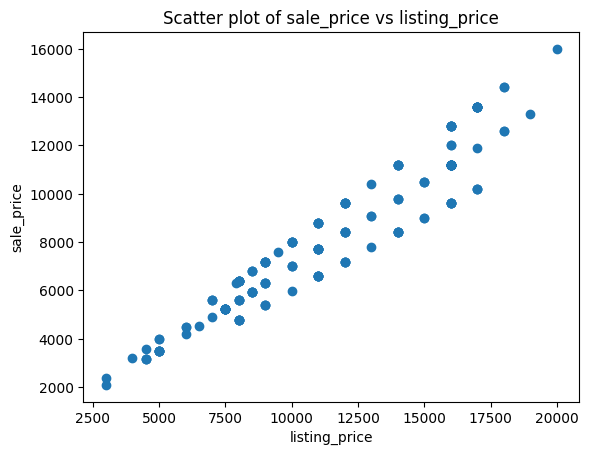

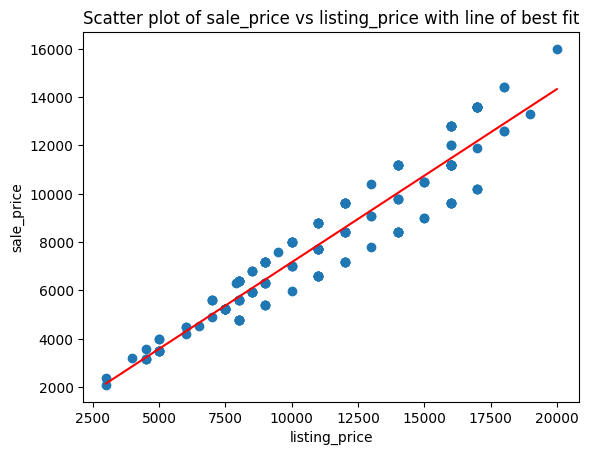

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Calculate the quartiles and the IQR
Q1 = df_nuevo['sale_price'].quantile(0.25)
Q3 = df_nuevo['sale_price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df_nuevo[(df_nuevo['sale_price'] > lower_bound) & (df_nuevo['sale_price'] < upper_bound)]

# Create a scatter plot
plt.scatter(df_no_outliers['listing_price'], df_no_outliers['sale_price'])
plt.xlabel('listing_price')
plt.ylabel('sale_price')
plt.title('Scatter plot of sale_price vs listing_price')
plt.show()

# Perform the linear regression
slope, intercept = np.polyfit(df_no_outliers['listing_price'], df_no_outliers['sale_price'], 1)

# Create a line of best fit
x_values = np.linspace(df_no_outliers['listing_price'].min(), df_no_outliers['listing_price'].max(), 100)
y_values = slope * x_values + intercept

# Plot the line of best fit
plt.scatter(df_no_outliers['listing_price'], df_no_outliers['sale_price'])
plt.plot(x_values, y_values, color='red')
plt.xlabel('listing_price')
plt.ylabel('sale_price')
plt.title('Scatter plot of sale_price vs listing_price with line of best fit')
plt.show()

Dentro del desarrollo se encontró que existían precios de venta atípicos, los cuales causaban un comportamiento abrupto dentro de la regresión, haciendo dificil que se pudiese explicar de manera correcta la base de datos. Así que se eliminaron estos valores atípicos y se demostró cómo la regresión sigue de una manera más natural la serie de datos.

**<h1>Modelo de regresión</h1>**

## Primer modelo
Haremos un modelo de regresion lineal con solo un predictor que será listing_price y una variable de respuesta que es sale_price.

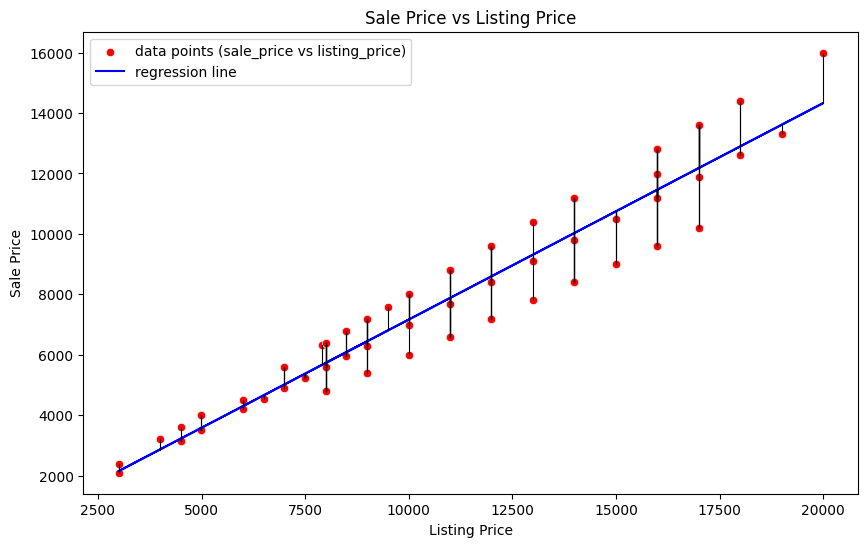

In [90]:
# Crear el gráfico de dispersión con puntos de datos en rojo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='listing_price', y='sale_price', data=df_no_outliers, color='red', label='data points (sale_price vs listing_price)')

# Ajustar la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df_no_outliers['listing_price'], df_no_outliers['sale_price'], 1)
plt.plot(df_no_outliers['listing_price'], slope * df_no_outliers['listing_price'] + intercept, color='blue', label='regression line')

# Dibujar líneas que conectan cada punto con la línea de tendencia
for index, row in df_no_outliers.iterrows():
    x = row['listing_price']
    y_actual = row['sale_price']
    y_estimado = slope * x + intercept
    plt.plot([x, x], [y_actual, y_estimado], color='black', linewidth=0.8)

# Etiquetas y título
plt.xlabel('Listing Price')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Listing Price')
plt.legend()

# Mostrar el gráfico
plt.show()

La gráfica de la tendencia luego de haber realizado la imputación, eliminar outliers y generar un ambiente en los datos más real demuestra como la regresión sigue de una manera mas acertada y logra explicar en mayor relación porcentual el comportamiento de los datos.

In [91]:
df_no_outliers = pd.DataFrame(df_no_outliers)

# Añadir una columna de unos para el término de intercepción
df_no_outliers['intercept'] = 1

# Definir las variables independiente (X) y dependiente (y)
X = df_no_outliers[['intercept', 'listing_price']]
y = df_no_outliers['sale_price']
print(X.head())
# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())

    intercept  listing_price
21          1           7995
33          1          15995
56          1          15995
69          1          13995
87          1          10995
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1796.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           6.80e-96
Time:                        23:47:14   Log-Likelihood:                -1505.4
No. Observations:                 183   AIC:                             3015.
Df Residuals:                     181   BIC:                             3021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err 

Se puede observar que la variable de listing_price es significativa,el R-cuadrado es de 0.908, lo cual se debe a que el 90% de los puntos se están ajustando bien a la línea de regresión, esto tiene sentido, ya que los valores de precio de venta se colocan segun los costos asociados. Se analiza que un incremento unitario en el listing_price se asocia con un incremento de 0.7164 unidades en sales_price.  

Se observa que el modelo tiene problemas de multicolinealidad y que el intercepto no es significativo, lo cual significa un sesgo y por esto haremos otro modelo incluyendo las demás variables. 

Este modelo se baso en contrastar  el listing price y el sale price para reconocer el resultado de la limpieza realizada y se demostro como mejoro de manera gigante el seguimiento de la serie de datos por el modelo.

## Modelo 2

In [92]:
X = df_no_outliers[['listing_price', 'category', 'reviews']] 
y = df_no_outliers['sale_price']  # Aquí debes reemplazar 'Target' con la columna que deseas utilizar como variable dependiente

# Añadir término de intercepción a X
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     592.6
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.11e-92
Time:                        23:49:56   Log-Likelihood:                -1505.3
No. Observations:                 183   AIC:                             3019.
Df Residuals:                     179   BIC:                             3031.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -52.2100    247.986     -0.211

Ninguna variable da significativa, solo la que ya habiamos realizado, listing_price, el R2 ajustado da 0,907. Este modelo también tiene multicolinealidad. Realizaremos otro para omitir este error.

## Modelo 3

In [93]:
df_no_outliers['listing_price_cubed'] = df_no_outliers['listing_price'] ** 3

# Definir las variables independientes (X) y la variable dependiente (y)
X = df_no_outliers[['listing_price', 'listing_price_cubed']]  # Variables independientes
y = df_no_outliers['sale_price']  # Variable dependiente

# Añadir una constante al conjunto de datos para ajustar el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     917.4
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           3.92e-95
Time:                        23:50:39   Log-Likelihood:                -1503.1
No. Observations:                 183   AIC:                             3012.
Df Residuals:                     180   BIC:                             3022.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 771.9087    

Al hacer una opción colocando la variable al cuadrado, nos da una variable no significativa, colocandola al cubo da una variable significativa, pero sigue teniendo el mismo error, por lo tanto se hará lo siguiente.

In [94]:
import pandas as pd
from sklearn.linear_model import Lasso



# Definir las variables independientes y la variable dependiente
X = df_no_outliers[['listing_price', 'listing_price_cubed']]
y = df_no_outliers['sale_price']

# Crear un modelo de regresión Lasso
modelo = Lasso(alpha=0.1)

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Imprimir los coeficientes
print(modelo.coef_)

[6.0011673e-01 2.7552630e-10]


## Modelo 4

In [95]:
# Definir las variables independientes y la variable dependiente
X = df_no_outliers[['listing_price', 'listing_price_cubed']]
y = df_no_outliers['sale_price']

# Crear un modelo de regresión Lasso
modelo_lasso = Lasso(alpha=0.1)

# Ajustar el modelo a los datos
modelo_lasso.fit(X, y)

# Seleccionar las variables independientes seleccionadas por Lasso
X_selected = X.loc[:, modelo_lasso.coef_ != 0]

# Ajustar un modelo de regresión lineal utilizando OLS con las variables independientes seleccionadas
modelo_ols = sm.OLS(y, X_selected).fit()

# Imprimir el resumen del modelo
print(modelo_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:             sale_price   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              8302.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):                   9.22e-179
Time:                        23:51:39   Log-Likelihood:                         -1504.9
No. Observations:                 183   AIC:                                      3014.
Df Residuals:                     181   BIC:                                      3020.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

La adición de la variable "listing_price_cubed" permite capturar patrones más complejos en los datos que no pueden ser modelados adecuadamente por una relación lineal simple. Esto puede ser útil cuando hay una relación no lineal entre las variables, como podría ser el caso cuando el impacto del precio de listado en el precio de venta no es uniforme a lo largo de todo el rango de precios.
  En este caso, al no incluir al R-squared una constante, el  se calcula sin ajustar los datos para tener un punto de intercepción en el origen.
  los errores estándar se calculan asumiendo que la matriz de covarianza de los errores está correctamente especificada
  

**<h1>Modelo de regresión ponderada</h1>**

## Modelo 5

In [96]:
# Definir las variables independientes y la variable dependiente
X = df_no_outliers[['listing_price']]
y = df_no_outliers['sale_price']

# Añadir una constante al conjunto de datos para ajustar el intercepto
X = sm.add_constant(X)

# Crear un modelo de regresión ponderada
modelo = sm.WLS(y, X, weights=1/df_no_outliers['sale_price']**2)

# Ajustar el modelo a los datos
resultados = modelo.fit()

# Imprimir el resumen del modelo
print(resultados.summary())

                            WLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.937
Model:                            WLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     2694.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.25e-110
Time:                        23:52:35   Log-Likelihood:                -1480.5
No. Observations:                 183   AIC:                             2965.
Df Residuals:                     181   BIC:                             2971.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           205.7015    117.631      1.749

El mejor modelo ha sido el modelo de regresión ponderada el cuál es en el que se asignan pesos diferentes a las observaciones en función de su importancia o precisión, con el objetivo de mejorar la precisión y la interpretación del modelo en situaciones donde las observaciones pueden no tener la misma precisión.

Al hacer dicha acción la constante y el listing price son significativos además de tener un modelo que explica el 93% de los datos 
los errores estándar se calculan asumiendo que la matriz de covarianza de los errores está correctamente especificada.

El coeficiente asociado a la variable listing_price es 0.6817, lo que indica que, manteniendo todas las demás variables constantes, un aumento de una unidad en listing_price se asocia, en promedio, con un aumento de 0.6817 unidades en la variable sale_price.

In [97]:
# Definir las variables independientes y la variable dependiente
X = df_no_outliers[['listing_price', 'listing_price_cubed']]
y = df_no_outliers['sale_price']

# Añadir una constante al conjunto de datos para ajustar el intercepto
X = sm.add_constant(X)

# Calcular el VIF para cada variable independiente
vif = pd.DataFrame()
vif['variables'] = X.columns[1:]
vif['VIF'] = [sm.OLS(y, sm.add_constant(X.drop(column, axis=1))).fit().rsquared * (X.shape[0]-1-1)/(1-sm.OLS(y, sm.add_constant(X)).fit().rsquared) for column in X.columns[1:]]

# Eliminar la variable con el VIF más alto
max_vif_var = vif.loc[vif['VIF'].idxmax()]
X = X.drop(max_vif_var['variables'], axis=1)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1796.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           6.80e-96
Time:                        23:54:57   Log-Likelihood:                -1505.4
No. Observations:                 183   AIC:                             3015.
Df Residuals:                     181   BIC:                             3021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3105    203.762      0.016

El problema de multicolinealidad persiste aunque se pruebe eliminando el vif de la variable lo cual es una medida que cuantifica la severidad de la multicolinealidad entre las variables predictoras en un modelo de regresión basado en eso la multicolinealidad ocurre cuando dos o más variables predictoras en un modelo están altamente correlacionadas entre sí, lo que puede afectar la precisión de las estimaciones de los coeficientes y la interpretación del modelo.

**<h1>Conclusión</h1>**

Se cae en un problema en donde la multicolinealidad existe dentro de todos los modelos, solamente logrando elevar el r_squared
dentro del modelo de regresión ponderada, esto debido a la asignación de los pesos dentro del ajuste del modelo. Se llega al análisis respecto a la multicolinealidad de cómo esta es causada por la alta correlación entre el "listing price" y el "sale price", esto debido a que los precios de venta se ajustan según los costos asociados, causando un problema de multicolinealidad. Además, el modelo asume que la matriz de covarianza está bien especificada. Siendo así, el modelo de regresión ponderada es el mejor modelo dentro del análisis realizado para la explicación del "sale price".

#### Referencias:

"Yakutsa (Año). Product Segmentations: Nike Shoes. Recuperado de [(https://www.kaggle.com/code/yakutsa/product-segmentations-nike-shoes)]".

Base de datos. Ulrik Thyge Pedersen. (s.f.). Nike Shoes Sales. Recuperado de https://www.kaggle.com/datasets/ulrikthygepedersen/nike-shoes-sales/data